# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import warnings
warnings.filterwarnings('ignore')

# Reading 15 Days Data of DevNation

In [2]:
devnation_csv=['day1.csv','day2.csv','day3.csv','day4.csv','day5.csv','day6.csv','day7.csv','day8.csv','day9.csv','day10.csv','day11.csv','day12.csv','day13.csv','day14.csv','day15.csv']
loaded_csv=[]
for i in range(len(devnation_csv)):
    df = pd.read_csv(devnation_csv[i])
    loaded_csv.append(df.drop(['Guest','User Email'],axis=1))

# Merging 15 Days Data into Single DataFrame 

In [3]:
df_merged=reduce(lambda left,right:pd.merge(left,right,on=['Name (Original Name)'],how='outer'),loaded_csv)
df_merged.columns=['Name','day1','day2','day3','day4','day5','day6','day7','day8','day9','day10','day11','day12','day13','day14','day15']

# 1.	Average time spent in the class. 

In [4]:
Avg_time = df_merged.mean()
def Question_1():
    return Avg_time
Question_1()

day1     62.620690
day2     67.310345
day3     74.964286
day4     88.888889
day5      7.333333
day6     77.566667
day7     73.275862
day8     57.523810
day9     40.266667
day10    22.428571
day11     6.181818
day12     8.714286
day13    14.333333
day14     6.333333
day15    53.863636
dtype: float64

# 2.	How does average time in class change with the date

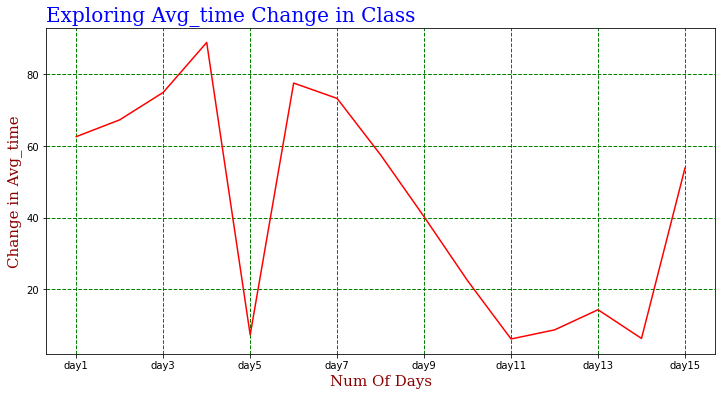

In [18]:
def Question_2():    
    Avg_time.plot(kind='line',figsize=(12,6),color='r') 
    font1 = {'family':'serif','color':'blue','size':20}
    font2 = {'family':'serif','color':'darkred','size':15}
    plt.title('Exploring Avg_time Change in Class',loc='left',fontdict=font1)
    plt.ylabel('Change in Avg_time',fontdict=font2)
    plt.xlabel('Num Of Days',fontdict=font2)
    plt.grid(color = 'green', linestyle = '--', linewidth = 1.0)
    plt.show()
Question_2()

# Creating DataFrame to Check Attendance change over Time

In [6]:
Daily_attendance=[]
for i in range(len(loaded_csv)):
        temp = loaded_csv[i]['Name (Original Name)'].count()
        Daily_attendance.append(temp)
        Days = [day for day in range(1,16)]
Attendance_cahnge_over_time=pd.DataFrame()
Attendance_cahnge_over_time['Days']=Days
Attendance_cahnge_over_time['Daily_attendance']=Daily_attendance

# 3.	How does attendance(total students) change over time

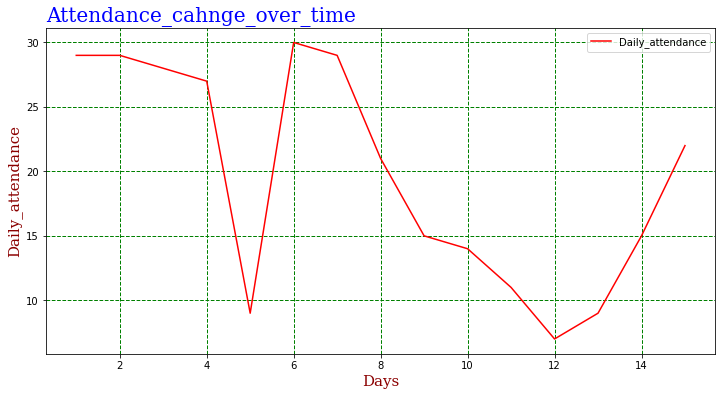

In [17]:
def Question_3():    
    Attendance_cahnge_over_time.plot(kind='line',x='Days',y='Daily_attendance',figsize=(12,6),color='r')
    font1 = {'family':'serif','color':'blue','size':20}
    font2 = {'family':'serif','color':'darkred','size':15}
    plt.title('Attendance_cahnge_over_time',loc='left',fontdict=font1)
    plt.ylabel('Daily_attendance',fontdict=font2)
    plt.xlabel('Days',fontdict=font2)
    plt.grid(color = 'green', linestyle = '--', linewidth = 1.0)
    plt.show()
Question_3()

# 4.	Who are the worst-performing students, in terms of attendance 

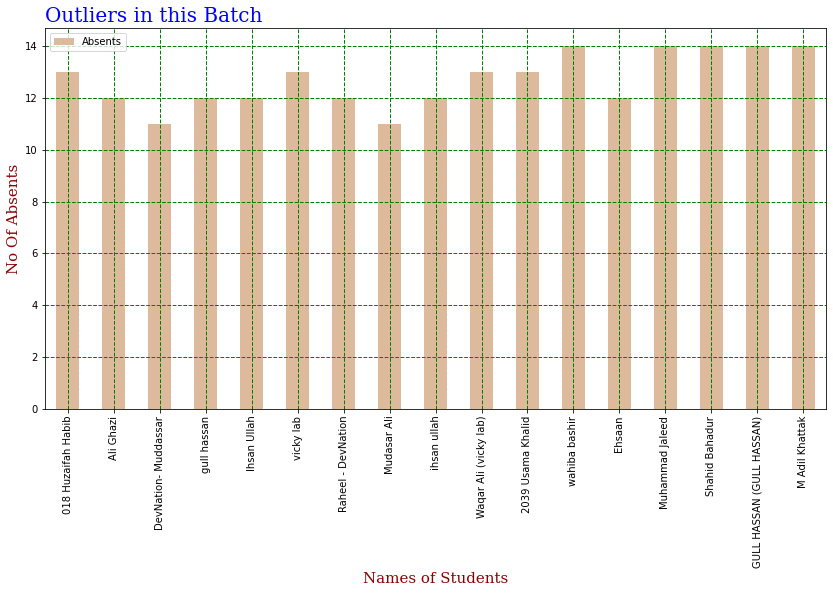

In [15]:
def Question_4():
    student_absents = []
    for x in range(44):
        student_absents.append(df_merged.iloc[x].isnull().sum())
    df_merged['Absents'] = student_absents 
    outliers = df_merged.loc[df_merged['Absents']>10]
    outliers.plot(kind= 'bar', x= 'Name',y='Absents',figsize=(14,7),color='#DEBA9D')
    font1 = {'family':'serif','color':'blue','size':20}
    font2 = {'family':'serif','color':'darkred','size':15}
    plt.title('Outliers in this Batch',loc='left',fontdict=font1)
    plt.ylabel('No Of Absents',fontdict=font2)
    plt.xlabel('Names of Students',fontdict=font2)
    plt.grid(color = 'green', linestyle = '--', linewidth = 1.0)
    plt.show()
Question_4()

# 5.	Plot a box whisker diagram to represent median, upper quartile, lower quartile, and range of time spend in the class. 

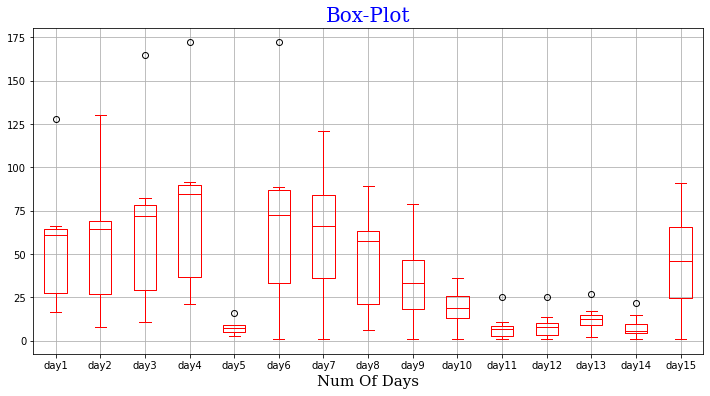

In [23]:
def Question_5():
    Days = df_merged.iloc[:,0:16]
    a =Days.describe()
    a.boxplot(figsize=(12,6),color='r')
    font1 = {'family':'serif','color':'blue','size':20}
    font2 = {'family':'serif','color':'black','size':15}
    plt.title('Box-Plot',fontdict=font1)
    plt.xlabel('Num Of Days',fontdict=font2)
    plt.show()
Question_5()

# 6.	Who are the Best-performing students, in terms of attendance

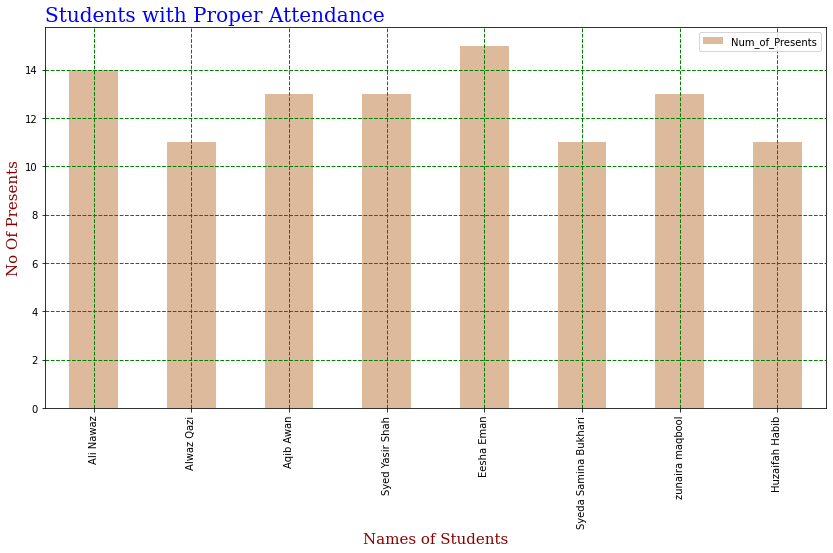

In [14]:
def Question_6():
    df_merged['Num_of_Presents'] = 15-df_merged['Absents']
    Proper_Attendance_Students = df_merged.loc[df_merged['Num_of_Presents']>10]
    Proper_Attendance_Students.plot(kind= 'bar', x= 'Name',y='Num_of_Presents',figsize=(14,7),color='#DEBA9D')
    font1 = {'family':'serif','color':'blue','size':20}
    font2 = {'family':'serif','color':'darkred','size':15}
    plt.title('Students with Proper Attendance',loc='left',fontdict=font1)
    plt.ylabel('No Of Presents',fontdict=font2)
    plt.xlabel('Names of Students',fontdict=font2)
    plt.grid(color = 'green', linestyle = '--', linewidth = 1.0)
    plt.show()
Question_6()